In [215]:
from MVN import MultivariateNormal
from MCMC import MetropolisHastings, Gibbs, Cholesky, SampleSet2D
from multiple_chains import MultipleChains, errors_sampler, plot_errors
from tqdm import tqdm

[autoreload of MCMC failed: Traceback (most recent call last):
  File "/home/jacopo/anaconda3/envs/python38env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/jacopo/anaconda3/envs/python38env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/jacopo/anaconda3/envs/python38env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/jacopo/anaconda3/envs/python38env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/home/jacopo/anaconda3/envs/python38env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = new
TypeError: __class__ assignment: 'MetropolisHastings' object layout differs from 'MetropolisHastings

In [216]:
mean = np.array([4, 2])
covariance = np.array([
    [1.44, -.702],
    [-.702, .81]])

CL = .90

n = MultivariateNormal(mean, covariance)
# this class, defined in a separate file, has all the properties we need

# n.plot_2d_analytical(3, 1, CL)
# bivariate plot of the Gaussian, including marginal distributions
# and conditioned distributions on the values provided as arguments
# and credible intervals for each univariate Gaussian 

In [217]:
# Let us see some numbers

mx = n.marginalize(0)
CI_x_analytical = mx.analytical_CI(CL)
my = n.marginalize(1)
CI_y_analytical = my.analytical_CI(CL)
print(f'The Credible Interval for x is between {CI_x_analytical[0]:.2f} and {CI_x_analytical[1]:.2f}')
print(f'The Credible Interval for y is between {CI_y_analytical[0]:.2f} and {CI_y_analytical[1]:.2f}')

The Credible Interval for x is between 2.03 and 5.97
The Credible Interval for y is between 0.52 and 3.48


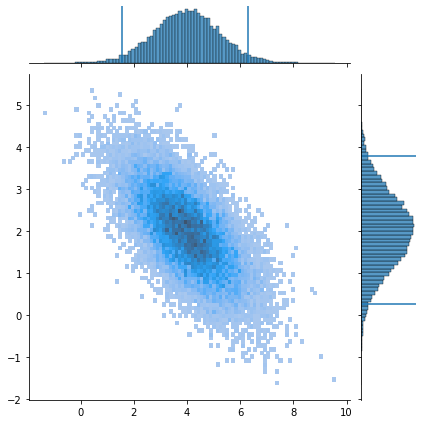

In [218]:
# CHOLESKY SAMPLING

samples_ch = SampleSet2D(n.cholesky_sample(20000))
samples_ch.samples_plot(.95, kind='hist')

In [219]:
# METROPOLIS - HASTINGS SAMPLING

# def gaussian_proposal(theta=None):
#     return (np.random.normal(scale=1, size=2))
from numpy.random import default_rng

def gaussian_proposal(theta=None):
    rng = default_rng()
    return(rng.standard_normal(size=2))

num_chains = 7
spread_initial_positions = 10
initial_positions = np.random.normal(scale=spread_initial_positions, size=(num_chains, 2))

chain_length = 200

mh = MultipleChains(MetropolisHastings, n.pdf, initial_positions,
                       chain_length, gaussian_proposal)

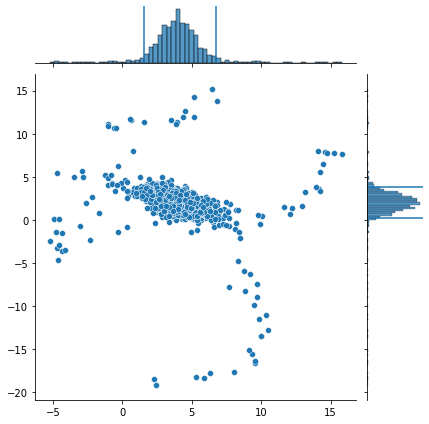

In [220]:
samples_mh = SampleSet2D(mh.all_chains)
samples_mh.samples_plot(CL, kind='scatter')

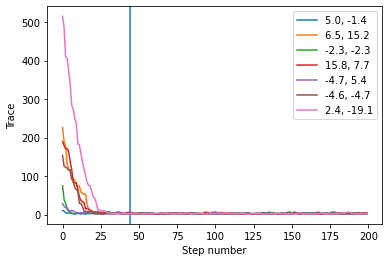

In [221]:
plt.axvline(mh.optimal_trimming)
mh.traces_plot(every=1)

In [222]:
mh.trim_chains(mh.optimal_trimming)
mh.extend_chains(int(1e4))

Trimming at 44


In [223]:
print(mh.R_estimator()) # < 1.02 in all its entries!
print(mh.autocorrelation_times()) # all close to 1! great
# am I underestimating these?

[[1.00080185 1.00098993]
 [1.00098993 1.00047978]]
[1.000065409986489, 1.000596181978846, 1.0001737875210608, 1.0006471925500426, 1.000510574470307, 1.001046009256138, 1.0002989181844337]


In [224]:
# SampleSet2D(mh.all_chains).samples_plot(CL, kind='kde')

In [225]:
# GIBBS SAMPLING
# from our distribution n

def conditional(i, theta):
    rng = default_rng()
    deviate = rng.standard_normal()
    
    conditioned = n.condition(i, theta[1-i])
    sigma = np.sqrt(conditioned.cov)
    return((conditioned.mean + sigma * deviate)[0,0])

g = MultipleChains(Gibbs, n.pdf, initial_positions, chain_length, conditional)


Trimming at 4


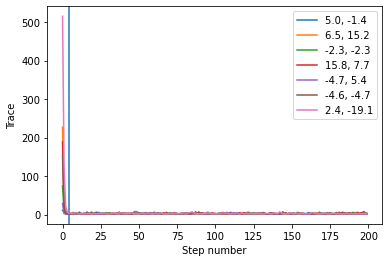

In [226]:
plt.axvline(g.optimal_trimming)
g.traces_plot(every=1)
g.trim_chains(g.optimal_trimming)

In [227]:
g.extend_chains(int(1e3))

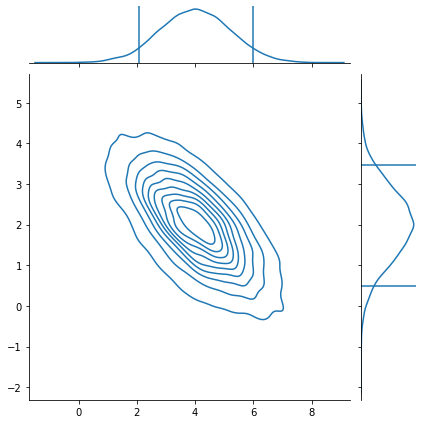

In [228]:
SampleSet2D(g.all_chains).samples_plot(CL, kind='kde')

In [229]:
chain_length = 10
# mc_1 = MultipleChains(Gibbs, n.pdf, initial_positions, chain_length, conditional)
# mc_1 = MultipleChains(MetropolisHastings, n.pdf, initial_positions[:1], chain_length, gaussian_proposal)
# mc_1 = MultipleChains(Cholesky, n.pdf, initial_positions, chain_length, n.cholesky_sample)

# trimming_index = 40
# N, e_mean, e_cov = errors_sampler(mc_1, n, max_num=int(2e3), trimming_index=trimming_index)

In [230]:
# plot_errors(N, e_mean, e_cov, mc_1, trimming_index=trimming_index)
# plt.savefig('errors_mh_1.pdf')

In [231]:
SS = SampleSet2D(g.all_chains)
x, y, z = SS.kde()

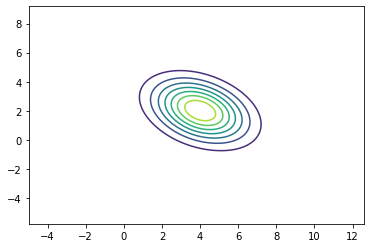

In [232]:
plt.contour(x, y, z)

In [242]:
yc, zc = SS.conditional_kde(0, 1)
cs = SS.conditional_cut(0, 1, .2)

[autoreload of MCMC failed: Traceback (most recent call last):
  File "/home/jacopo/anaconda3/envs/python38env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/jacopo/anaconda3/envs/python38env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/jacopo/anaconda3/envs/python38env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/jacopo/anaconda3/envs/python38env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/home/jacopo/anaconda3/envs/python38env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = new
TypeError: __class__ assignment: 'MetropolisHastings' object layout differs from 'MetropolisHastings

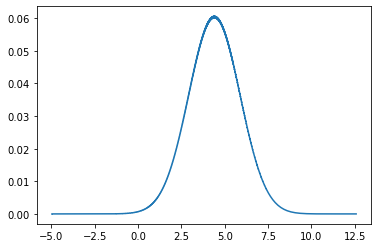

In [243]:
plt.plot(yc, zc)

(array([  2.,  16.,  40.,  86., 163., 191., 174.,  92.,  43.,  13.]),
 array([1.80721266, 2.35401123, 2.90080979, 3.44760836, 3.99440692,
        4.54120548, 5.08800405, 5.63480261, 6.18160118, 6.72839974,
        7.2751983 ]),
 <BarContainer object of 10 artists>)

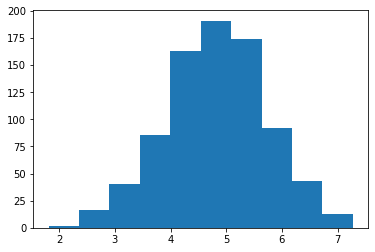

In [244]:
plt.hist(cs[:,0])